<a href="https://colab.research.google.com/github/DAOTHANHTRONG/BAITAPVENHA1/blob/main/mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = 'drive/MyDrive/GuongMat/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Binh '):
    output = 1.0
  if file.startswith('Dat '):
    output = 2.0
  if file.startswith('Dung '):
    output = 3.0
  if file.startswith('Ha '):
    output = 4.0
  if file.startswith('Hau '):
    output = 5.0

  photo = load_img(folder + file, target_size =(30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Train
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape,labels_train.shape)

(240, 30, 40, 3) (240,)


In [ ]:
folder = 'drive/MyDrive/GuongMatTest/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Binh '):
    output = 1.0
  if file.startswith('Dat '):
    output = 2.0
  if file.startswith('Dung '):
    output = 3.0
  if file.startswith('Ha '):
    output = 4.0
  if file.startswith('Hau '):
    output = 5.0

  photo = load_img(folder + file, target_size =(30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

# Test
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape,labels_test.shape)

(60, 30, 40, 3) (60,)


In [ ]:
class_Image =    {1: 'Binh',2: 'Dat',3: 'Dung',4: 'Ha',5: 'Hau'}

In [ ]:
#Reshape the sets and rescale within the byte range
photos_train = photos_train.reshape(240,30,40,3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape(60,30,40, 3)
photos_test = photos_test.astype('float32')/255

In [ ]:
# One-hot encode the target classes
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [ ]:
(photos_train.shape, labels_train.shape),(photos_test.shape, labels_test.shape)

(((240, 30, 40, 3), (240, 6)), ((60, 30, 40, 3), (60, 6)))

In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 128
epochs = 20
classes = 6

model = Sequential()
# CNN
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(30,40,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))

# ANN
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes ,activation = 'softmax'))

# Compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac cua ham', test_acc)
print('Ham mat mat', test_loss)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                    

In [ ]:
model.save('drive/MyDrive/modelGuongmat.h5')

1/1 [==============================] - 0s 218ms/step
Predicted:  Binh


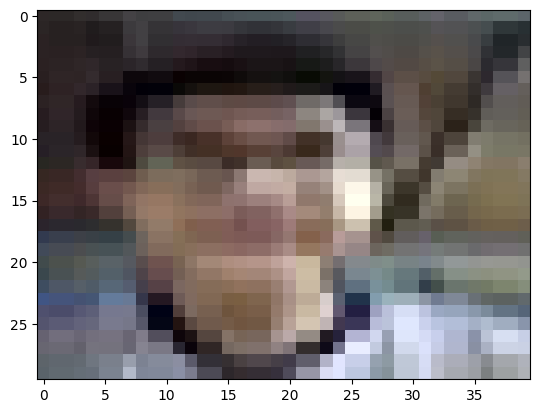

In [ ]:
#test
import matplotlib.pyplot as plt
import numpy as np 
filePath = '/content/drive/MyDrive/Binh.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Image[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 18ms/step
Predicted:  Hau


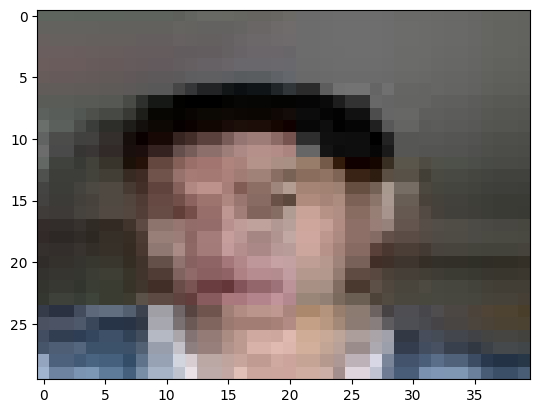

In [ ]:
import numpy as np 
filePath = '/content/drive/MyDrive/Hau.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Image[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  Dung


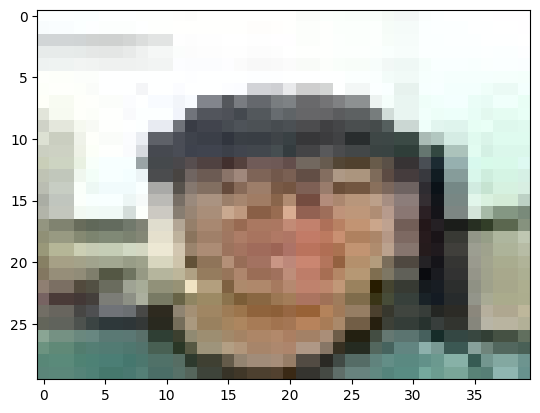

In [ ]:
import numpy as np 
filePath = '/content/drive/MyDrive/Dung.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Image[pred])
plt.imshow(testImage)